WARNING (theano.gof.compilelock): Overriding existing lock by dead process '70280' (I am process '70425')
logp = -10.252, ||grad|| = 15: 100%|██████████| 7/7 [00:00<00:00, 1814.82it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 402000/402000 [00:34<00:00, 11508.45draws/s]
The number of effective samples is smaller than 25% for some parameters.
/Users/nicolasatkins/.conda/envs/Advanced-Algorithmic-Trading/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/nicolasatkins/.conda/envs/Advanced-Algorithmic-Trading/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
/Users/nicolasatkins/.conda/envs/Advanced-Algorithmic-Trading/lib

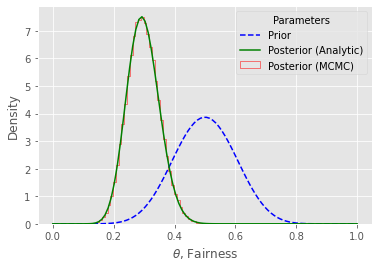

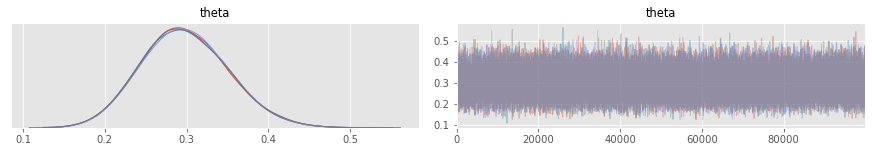

In [1]:


import matplotlib.pyplot as plt
import numpy as np
import pymc3
import scipy.stats as stats

plt.style.use("ggplot")

# Parameter values for prior and analytic posterior
n = 50
z = 10
alpha = 12
beta = 12
alpha_post = 22
beta_post = 52

# How many samples to carry out for MCMC
iterations = 100000

# Use PyMC3 to construct a model context
basic_model = pymc3.Model()
with basic_model:
    # Define our prior belief about the fairness
    # of the coin using a Beta distribution
    theta = pymc3.Beta("theta", alpha=alpha, beta=beta)

    # Define the Bernoulli likelihood function
    y = pymc3.Binomial("y", n=n, p=theta, observed=z)

    # Carry out the MCMC analysis using the Metropolis algorithm
    # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
    start = pymc3.find_MAP()

    # Use the Metropolis algorithm (as opposed to NUTS or HMC, etc.)
    step = pymc3.Metropolis()

    # Calculate the trace
    trace = pymc3.sample(iterations, step, start, random_seed=1, progressbar=True)

# Plot the posterior histogram from MCMC analysis
bins = 50
plt.hist(
    trace["theta"], bins,
    histtype="step", density=True,
    label="Posterior (MCMC)", color="red"
)

# Plot the analytic prior and posterior beta distributions
x = np.linspace(0, 1, 100)
plt.plot(
    x, stats.beta.pdf(x, alpha, beta),
    "--", label="Prior", color="blue"
)
plt.plot(
    x, stats.beta.pdf(x, alpha_post, beta_post),
    label='Posterior (Analytic)', color="green"
)

# Update the graph labels
plt.legend(title="Parameters", loc="best")
plt.xlabel("$\\theta$, Fairness")
plt.ylabel("Density")
plt.show()

# Show the trace plot
pymc3.traceplot(trace)
plt.show()